<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/meal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demand Prediction

### Import package and data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/meal/train.csv')
prediction_data = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/meal/test.csv')
center = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/meal/fulfilment_center_info.csv')
meal = pd.read_csv('https://raw.githubusercontent.com/JaperTai77/data-modified/main/meal/meal_info.csv')
df = train
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [ ]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
df = df.merge(center, on = 'center_id')
df = df.merge(meal, on = 'meal_id')
df = df.drop(columns = ['center_id','meal_id'])

In [ ]:
prediction_data = prediction_data.merge(center, on = 'center_id')
prediction_data = prediction_data.merge(meal, on = 'meal_id')
prediction_data = prediction_data.drop(columns = ['center_id','meal_id'])

## Visualization

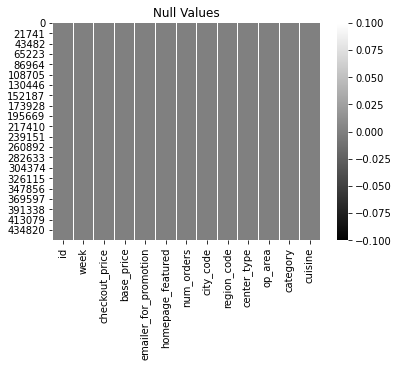

In [ ]:
sns.heatmap(df.isnull(),cmap = 'binary_r')
plt.title('Null Values')
plt.show()

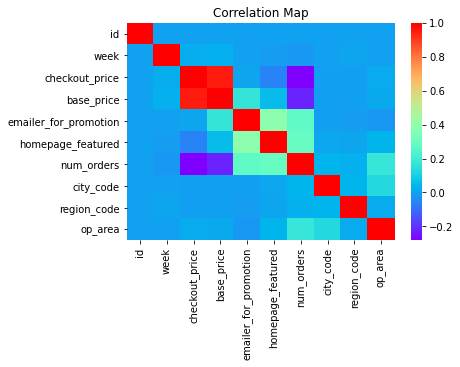

In [ ]:
sns.heatmap(df.corr(),cmap = 'rainbow')
plt.title('Correlation Map')
plt.show()

In [ ]:
def ana_plot(col):
  quantile1 = df[col].quantile(0.25)
  quantile3 = df[col].quantile(0.75)
  avg = df[col].mean()
  print('First quantile: %s' %quantile1)
  print('Mean: %s' %avg)
  print('Third quantile: %s' %quantile3)
  q =  1.5*(quantile3-quantile1)

  fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
  sns.boxplot(y = col, data = df,ax = ax1)
  ax1.set_title('%s boxplot' %col)
  ax1.text(0, quantile1-q, 'Lower bound: %s' %str(round(quantile1-q,2)), size=12, rotation=0,ha="center", va="top", color = 'blue')
  ax1.text(0, quantile3+q, 'Upper bound: %s' %str(round(quantile3+q,2)), size=12, rotation=0,ha="center", va="bottom", color = 'blue')
           
  sns.distplot(df[col], ax = ax2)
  ax2.set_title('Distribution of %s' %col)
  plt.show()

First quantile: 228.95
Mean: 332.2389325552486
Third quantile: 445.23


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


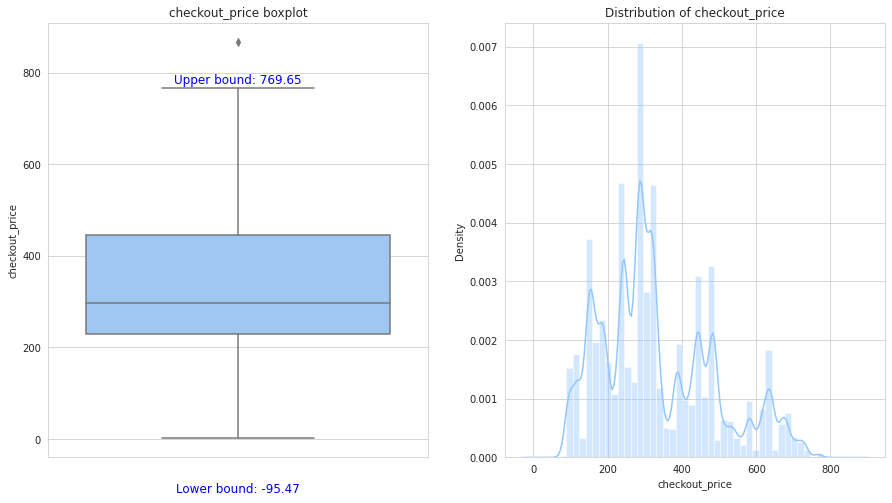

In [ ]:
plt.style.use('seaborn-pastel')
sns.set_style('whitegrid')
ana_plot(col = 'checkout_price')

First quantile: 243.5
Mean: 354.1566274526054
Third quantile: 458.87


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


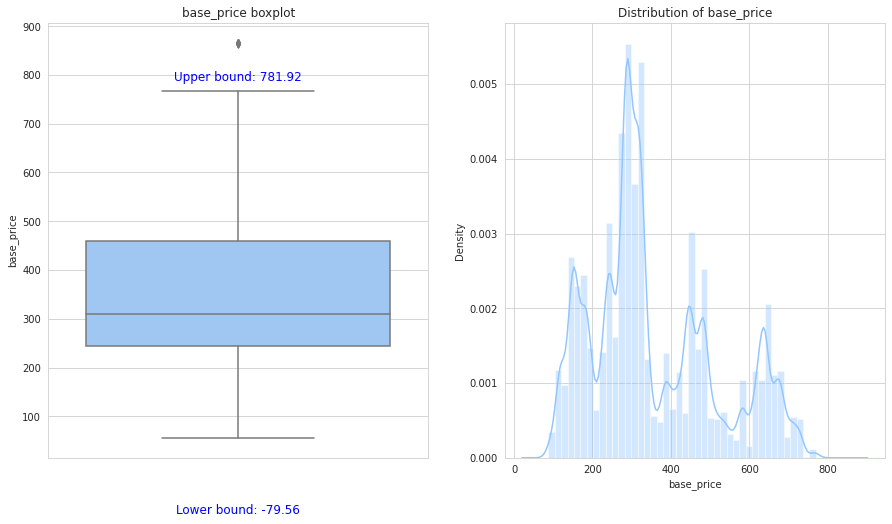

In [ ]:
ana_plot(col = 'base_price')

First quantile: 54.0
Mean: 261.8727603669275
Third quantile: 324.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


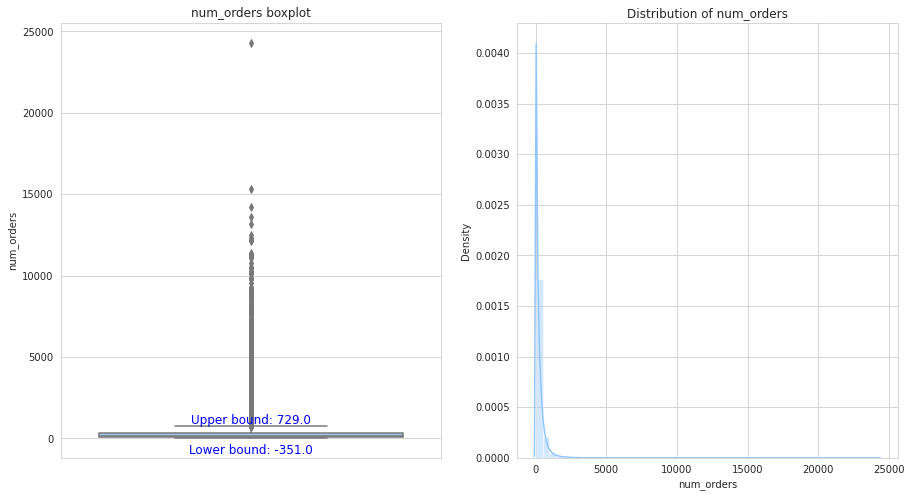

In [ ]:
ana_plot(col = 'num_orders')

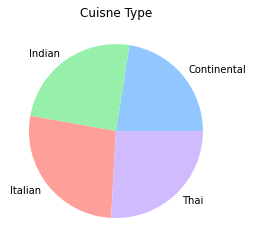

In [ ]:
temp = df.groupby(['cuisine']).agg({'cuisine':'count'})

plt.style.use('seaborn-pastel')
plt.pie(temp.cuisine, labels=temp.index)
plt.title('Cuisne Type')
plt.show()

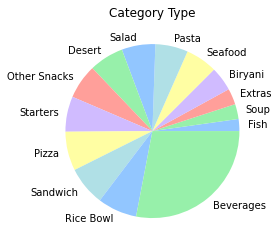

In [ ]:
temp = df.groupby(['category']).agg({'category':'count'})
temp.columns = ['count']
temp = temp.sort_values('count')

plt.pie(temp['count'],labels=temp.index,)
plt.title('Category Type')
plt.show()

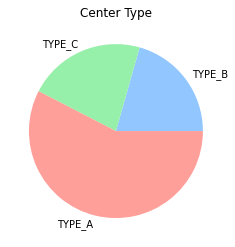

In [ ]:
temp = df.groupby(['center_type']).agg({'center_type':'count'})
temp.columns = ['count']
temp = temp.sort_values('count')

plt.pie(temp['count'],labels=temp.index,)
plt.title('Center Type')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


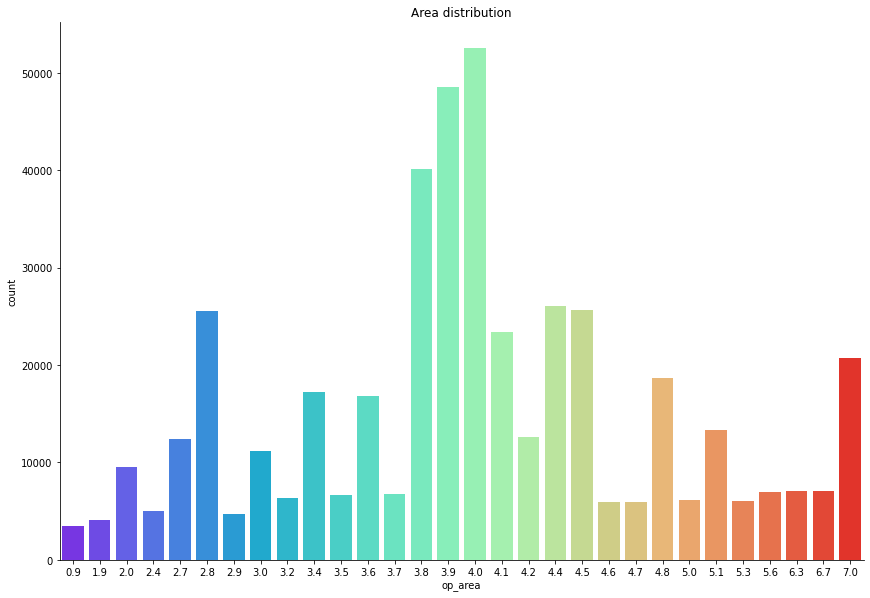

In [ ]:
sns.factorplot('op_area', data = df, kind = 'count',palette = 'rainbow', height = 8,aspect = 1.5)
plt.title('Area distribution')
plt.show()

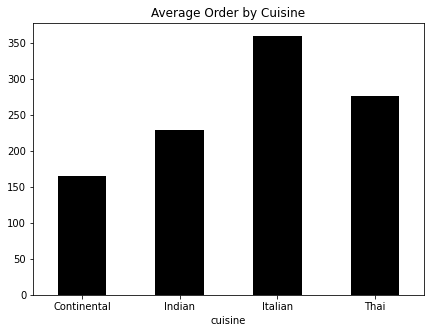

In [ ]:
df.groupby(['cuisine'])['num_orders'].mean().plot(kind = 'bar',color = 'black', title = 'Average Order by Cuisine', figsize = (7,5),rot = 0)

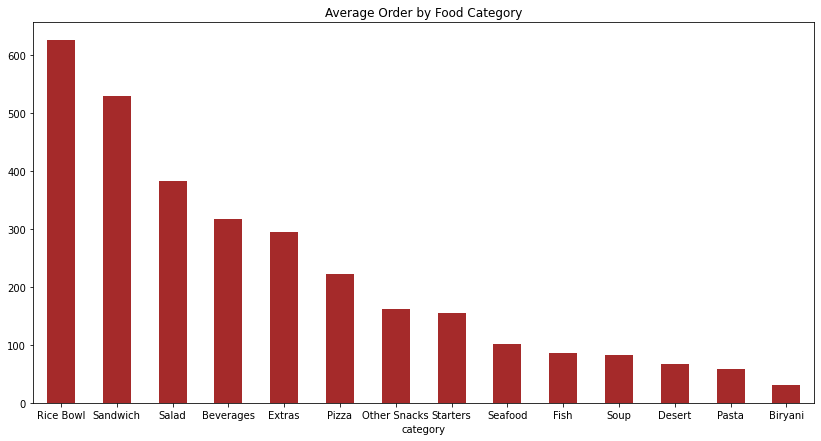

In [ ]:
df.groupby(['category'])['num_orders'].mean().sort_values(ascending = False).plot(kind = 'bar',color = 'brown', title = 'Average Order by Food Category', figsize = (14,7),rot = 0)

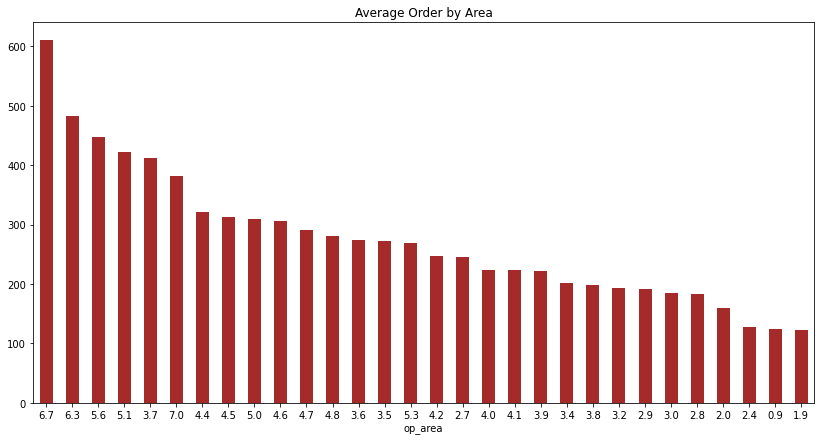

In [ ]:
df.groupby(['op_area'])['num_orders'].mean().sort_values(ascending = False).plot(kind = 'bar',color = 'brown', title = 'Average Order by Area', figsize = (14,7),rot = 0)

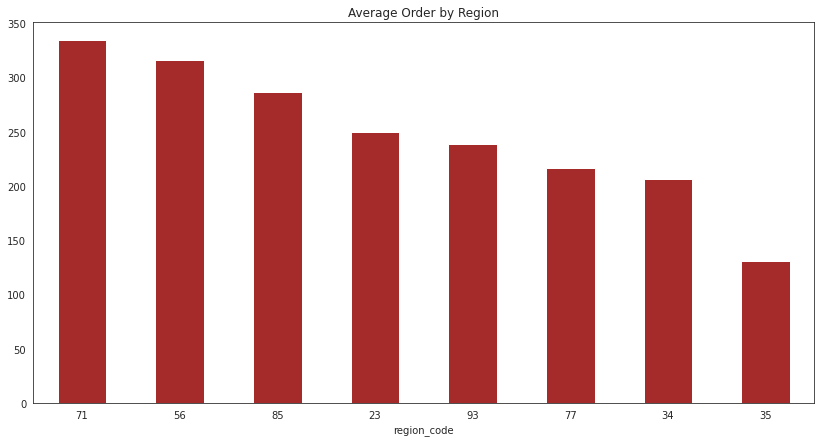

In [ ]:
df.groupby(['region_code'])['num_orders'].mean().sort_values(ascending = False).plot(kind = 'bar',color = 'brown', title = 'Average Order by Region', figsize = (14,7),rot = 0)

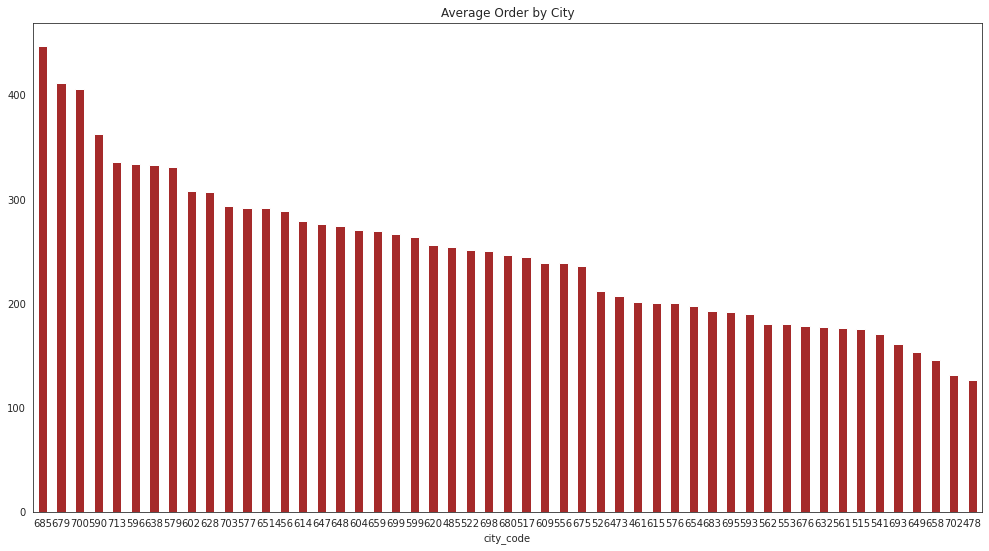

In [ ]:
df.groupby(['city_code'])['num_orders'].mean().sort_values(ascending = False).plot(kind = 'bar',color = 'brown', title = 'Average Order by City', figsize = (17,9),rot = 0)

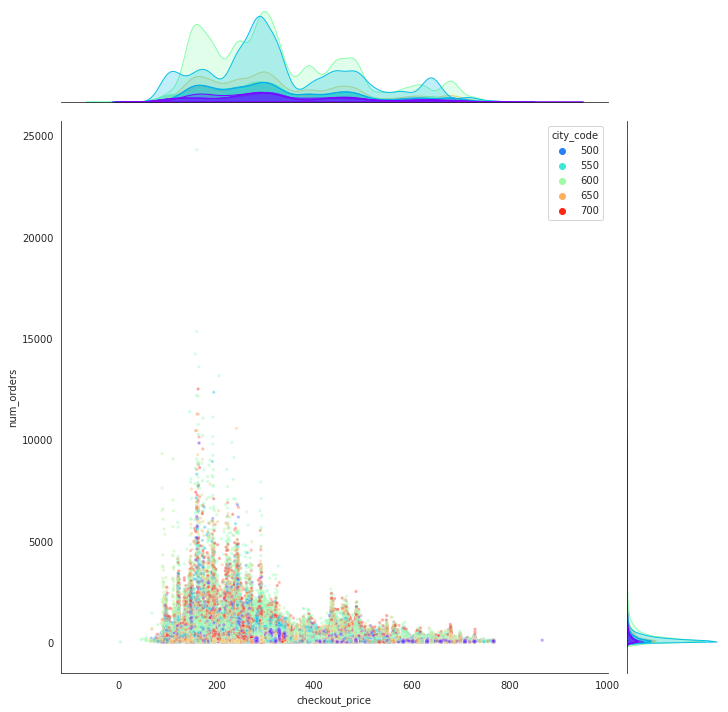

In [ ]:
sns.set_style('white')
sns.jointplot(y = 'num_orders', x = 'checkout_price', data = df, hue = 'city_code', height = 10, palette='rainbow', alpha = 0.4,joint_kws=dict(s=10))

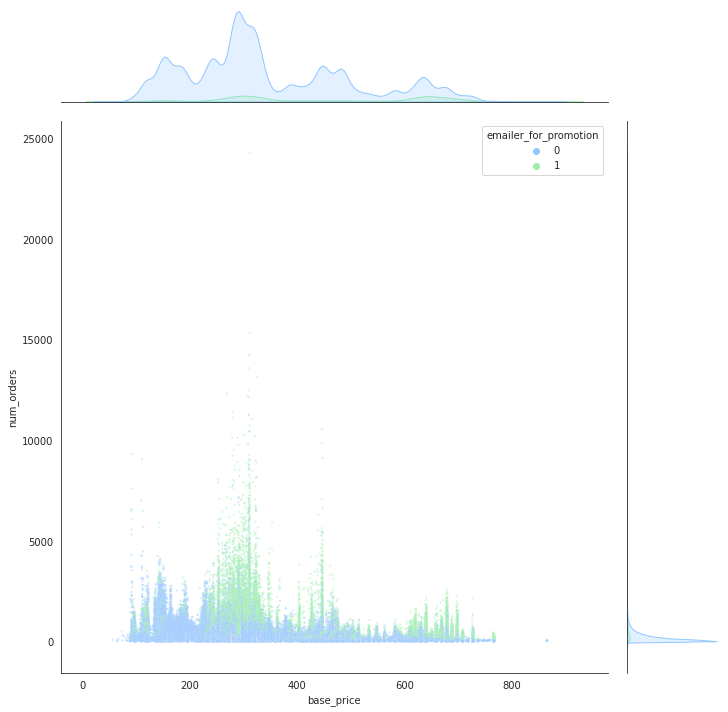

In [ ]:
sns.set_style('white')
sns.jointplot(y = 'num_orders', x = 'base_price', data = df, hue = 'emailer_for_promotion', height = 10, alpha = 0.4,joint_kws=dict(s=5))

## Data Engineering

Dummy variables

In [ ]:
df = df.drop(columns= ['id'])
temp = pd.get_dummies(df.op_area, prefix='area', drop_first=True)
temp2 = pd.get_dummies(df.cuisine, drop_first=True)
temp3 = pd.get_dummies(df.center_type, drop_first=True)
temp4 = pd.get_dummies(df.category, drop_first=True)
temp5 = pd.get_dummies(df.city_code, prefix='city', drop_first=True)
temp6 = pd.get_dummies(df.region_code, prefix='region', drop_first=True)
df = pd.concat([df,temp, temp2, temp3, temp4, temp5, temp6], axis = 1)
df = df.drop(columns=['op_area','cuisine','center_type','category','city_code','region_code'])

In [ ]:
prediction_data = prediction_data.drop(columns= ['id'])
temp = pd.get_dummies(prediction_data.op_area, prefix='area', drop_first=True)
temp2 = pd.get_dummies(prediction_data.cuisine, drop_first=True)
temp3 = pd.get_dummies(prediction_data.center_type, drop_first=True)
temp4 = pd.get_dummies(prediction_data.category, drop_first=True)
temp5 = pd.get_dummies(prediction_data.city_code, prefix='city', drop_first=True)
temp6 = pd.get_dummies(prediction_data.region_code, prefix='region', drop_first=True)
prediction_data = pd.concat([prediction_data,temp, temp2, temp3, temp4, temp5, temp6], axis = 1)
prediction_data = prediction_data.drop(columns=['op_area','cuisine','center_type','category','city_code','region_code'])

Outliers

In [ ]:
quantile1 = df.num_orders.quantile(0.25)
quantile3 = df.num_orders.quantile(0.75)
q = quantile3 - quantile1

lis = []
for item in df.num_orders:
    if quantile1-q > item or quantile3+q < item:
        lis.append(item)
print('There are %s outliers' %str(len(lis)))

There are 47726 outliers


In [ ]:
quantile1 = df.num_orders.quantile(0.25)
quantile3 = df.num_orders.quantile(0.75)
q = quantile3 - quantile1

lis = []
i = 0
for item in df.num_orders:
    if quantile1-q > item or quantile3+q < item:
        lis.append(i)
    i = i+1

In [ ]:
df_nooutlier = df.drop(index = lis)

## Machine Learning

In [ ]:
X = df_nooutlier.drop(columns = 'num_orders')
y = df_nooutlier.num_orders

In [ ]:
# no outliers
#X = df.drop(columns = 'num_orders')
#y = df.num_orders

In [ ]:
import statsmodels.api as sm
x = sm.add_constant(X)
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             num_orders   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     5534.
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        01:12:11   Log-Likelihood:            -2.4525e+06
No. Observations:              408822   AIC:                         4.905e+06
Df Residuals:                  408730   BIC:                         4.906e+06
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   132.10

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.20) 

### Linear Regression

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


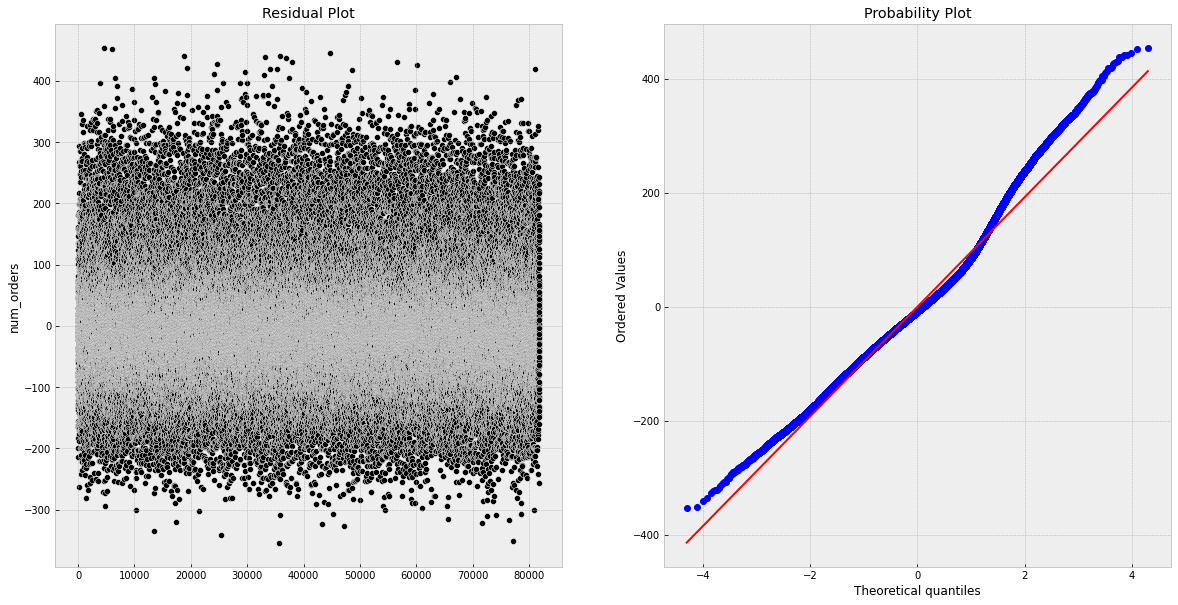

In [ ]:
from sklearn.linear_model import LinearRegression
from scipy.stats import probplot
lr = LinearRegression()
lr.fit(Xtrain,ytrain) 
y_pred_ols = lr.predict(Xtest)

y_pred_ols = lr.predict(Xtest)
resid = ytest - y_pred_ols

plt.style.use('bmh')
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)
sns.scatterplot(x = range(1,len(resid)+1),y = resid,color = 'black',ax = ax).set_title('Residual Plot')
plt.subplot(1,2,2)
ax = fig.add_subplot(122)
tuple_out = probplot(resid, plot=ax)
plt.show()

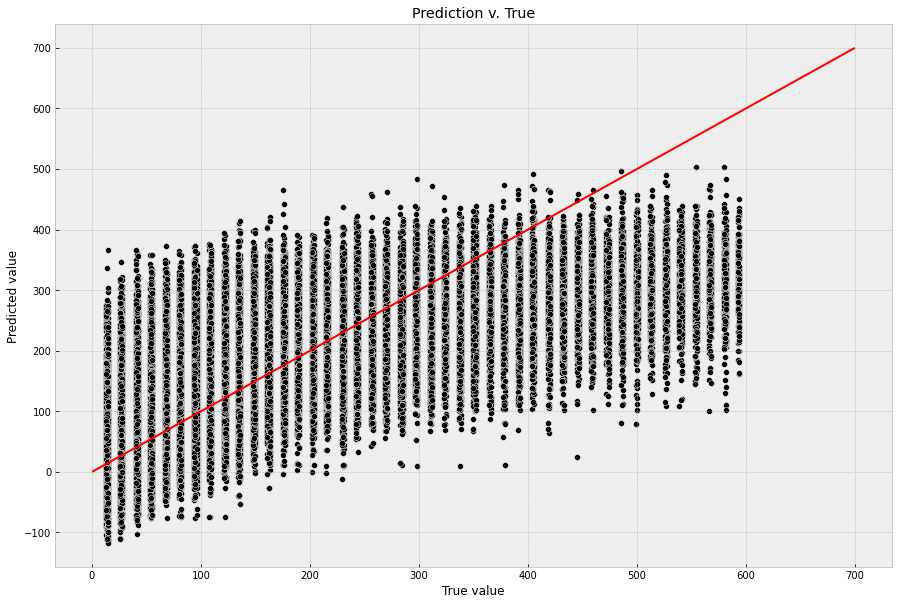

In [ ]:
plt.figure(figsize = (15,10))
sns.scatterplot(y = y_pred_ols, x = ytest, palette='pastel', color = 'black')
sns.lineplot(x = range(1,700), y = range(1,700), color = 'red')
plt.title('Prediction v. True')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

In [ ]:
# root mean square error
print(np.sqrt(((ytest - y_pred_ols)**2).mean()))
result_rmse = {}
result_rmse['OLS'] = np.sqrt(((ytest - y_pred_ols)**2).mean())

97.20261260366402


In [ ]:
# R-squared
from sklearn.metrics import r2_score
print(r2_score(ytest, y_pred_ols))
result_r2 = {}
result_r2['OLS'] = r2_score(ytest, y_pred_ols)

0.5529164583779573


### Create a smaller test and training set

In [ ]:
import random
l = []
for i in range (10000):
  l.append(random.randint(0,len(Xtrain)-1))
Xt_sub = Xtrain.reset_index().iloc[l,:].drop(columns = 'index')
yt_sub = ytrain.reset_index().iloc[l,:].drop(columns = 'index')

In [ ]:
n = 0
l2 = []
while n < 5000:
  s = random.randint(0,len(Xtrain)-1)
  if s not in l:
    l2.append(s)
    n = n+1

Xtest_sub = Xtrain.reset_index().iloc[l2,:].drop(columns = 'index')
ytest_sub = ytrain.reset_index().iloc[l2,:].drop(columns = 'index')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rft = RandomForestRegressor()

from sklearn.model_selection import GridSearchCV
gs_inst = GridSearchCV(rft, param_grid = {'n_estimators':[10,50,100],'max_depth':[5,10,20,30,40,50],'min_samples_leaf' :[1,3,5]},cv=5)
gs_inst.fit(Xt_sub, yt_sub)
gs_inst.best_params_
# {'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 100}

In [ ]:
rft = RandomForestRegressor(n_estimators = 100,max_depth = 30, min_samples_leaf =  1)
rft.fit(Xtrain, ytrain)
y_pred_forest = rft.predict(Xtest)

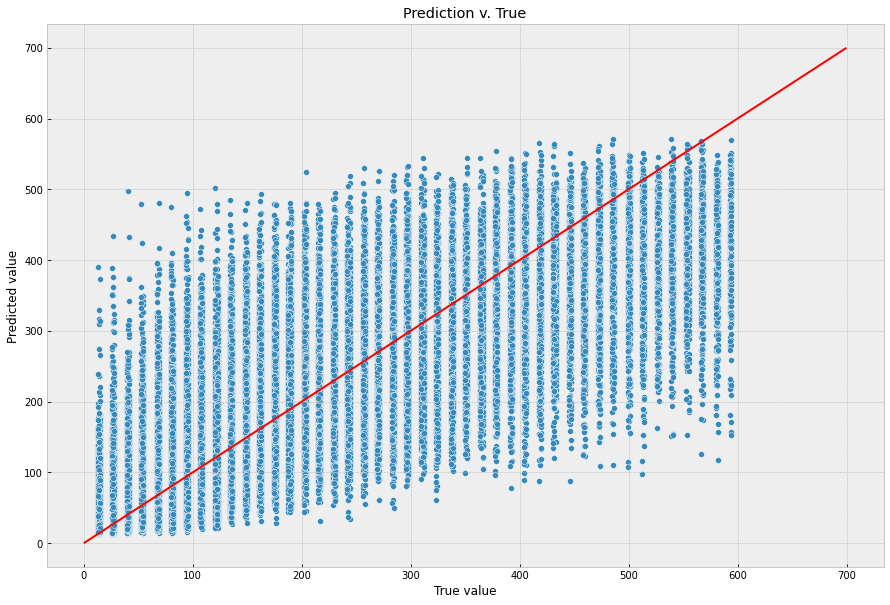

In [ ]:
plt.figure(figsize = (15,10))
sns.scatterplot(y = y_pred_forest, x = ytest)
sns.lineplot(x = range(1,700), y = range(1,700), color = 'red')
plt.title('Prediction v. True')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

In [ ]:
# root mean square error
print(np.sqrt(((ytest - y_pred_forest)**2).mean()))
result_rmse['forest'] = np.sqrt(((ytest - y_pred_forest)**2).mean())

75.61235792811209


In [ ]:
# R-squared
print(r2_score(ytest, y_pred_forest))
result_r2['forest'] = r2_score(ytest, y_pred_forest)

0.7294681704605703


### Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
l = []
for i in range (100000):
  l.append(random.randint(0,len(Xtrain)-1))
Xt_sub = Xtrain.reset_index().iloc[l,:].drop(columns = 'index')
yt_sub = ytrain.reset_index().iloc[l,:].drop(columns = 'index')

In [ ]:
model = Sequential()
model.add(Dense(109,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(54,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(27,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')
earstop = EarlyStopping(monitor = 'val_loss', mode ='min', verbose = 1, patience = 8)
model.fit(x = Xt_sub, y = yt_sub, validation_data=(Xtest_sub,ytest_sub), epochs = 300,callbacks = [earstop],batch_size = 128)

Epoch 1/300
782/782 [==============================] - 3s 3ms/step - loss: 26443.0410 - val_loss: 17138.8281
Epoch 2/300
782/782 [==============================] - 2s 2ms/step - loss: 17143.4375 - val_loss: 14832.0957
Epoch 3/300
782/782 [==============================] - 2s 2ms/step - loss: 14576.5547 - val_loss: 11237.7197
Epoch 4/300
782/782 [==============================] - 2s 2ms/step - loss: 13596.0527 - val_loss: 10026.7871
Epoch 5/300
782/782 [==============================] - 2s 2ms/step - loss: 13134.0518 - val_loss: 10062.6172
Epoch 6/300
782/782 [==============================] - 2s 2ms/step - loss: 12646.1064 - val_loss: 11132.3857
Epoch 7/300
782/782 [==============================] - 2s 2ms/step - loss: 12428.4189 - val_loss: 9399.2676
Epoch 8/300
782/782 [==============================] - 2s 2ms/step - loss: 12109.5557 - val_loss: 15158.3857
Epoch 9/300
782/782 [==============================] - 2s 2ms/step - loss: 11975.2207 - val_loss: 12884.9922
Epoch 10/300
782/782

In [ ]:
pred = model.predict(Xtest)
print(np.sqrt(((ytest - pred[:,0])**2).mean()))

89.22068463314014


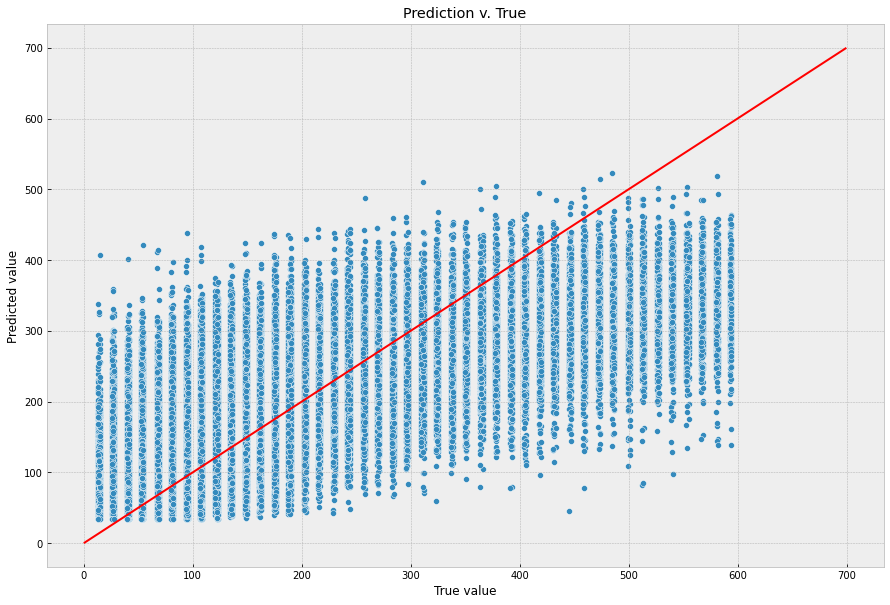

In [ ]:
plt.figure(figsize = (15,10))
sns.scatterplot(y = pred[:,0], x = ytest)
sns.lineplot(x = range(1,700), y = range(1,700), color = 'red')
plt.title('Prediction v. True')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show()

In [ ]:
# root mean square error
print(np.sqrt(((ytest - pred[:,0])**2).mean()))
result_rmse['neural_net'] = np.sqrt(((ytest - pred[:,0])**2).mean())

89.22068463314014


In [ ]:
# R-squared
from sklearn.metrics import r2_score
print(r2_score(ytest, pred[:,0]))
result_r2['neural_net'] = r2_score(ytest, pred[:,0])

0.6233186711923837


## Conclusion

In [ ]:
result_r2 = pd.DataFrame(result_r2,index=[0])
result_rmse = pd.DataFrame(result_rmse,index=[0])

Text(0.5, 1.0, 'R-squared')

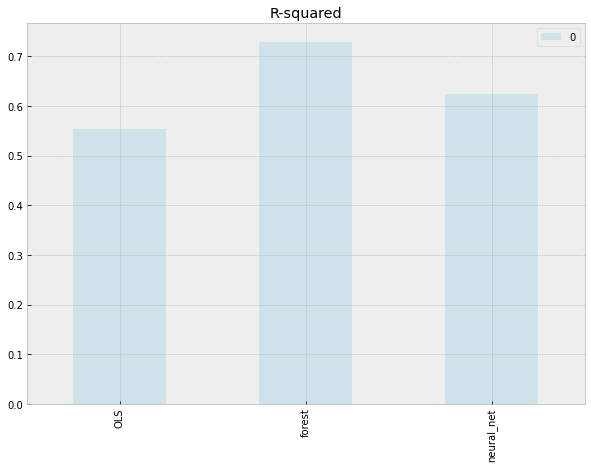

In [ ]:
result_r2.T.plot(kind = 'bar',color = 'lightblue',alpha = 0.5,figsize = (10,7),legend = False).set_title('R-squared')

Text(0.5, 1.0, 'Root Mean Square Error')

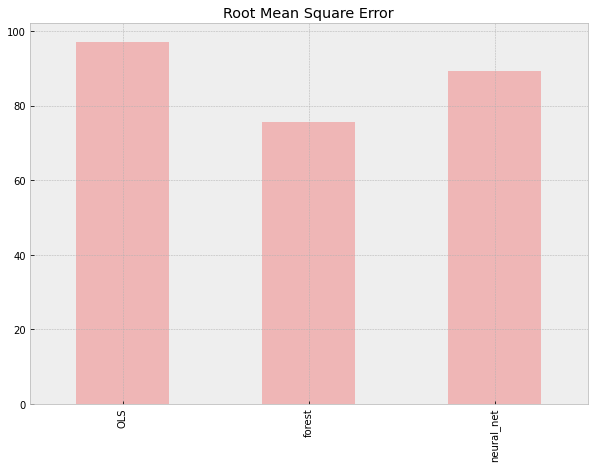

In [ ]:
result_rmse.T.plot(kind = 'bar',color = 'lightcoral',alpha = 0.5, legend = False,figsize = (10,7)).set_title('Root Mean Square Error')